In [17]:
## Import functions
import os
import openpyxl
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import json
from llm_demos.llama2.embeddings import llama_embed
from llm_demos.llama2.gguf import importance_f, classification
from llm_demos.llama2.class_prompt import classification_prompt
from llm_demos.llama2.prompt1 import class_prompt
from llm_demos.llama2.prompt2 import uptake_prompt
from llm_demos.llama2.prompt3 import question_prompt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
file_path = '/home/frattitamayo/memory_module/CodingDiscourseAnalysis/CollabWriteAnalysisTest.xlsm'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Test', parse_dates=['Message Time'])
observations = []
times = []

for index, row in df.iterrows():
    # Construct the observation for each row
    time_origin = row['Message Time']
    origin = f"Question: {row['Topic']}, Pseudonym: {row['Pseudonym']}"
    # origin = f"{row['Pseudonym']}"
    value = row['Message']
    observation = (time_origin, origin, value)
     #observation = [(origin_1, value_1), (origin_2, value_2), ..., (origin_n, value_n)]
    observations.append(observation)


In [5]:
class Observation:
    def __init__(self, time_origin, origin, value, ): # Origin, Emitter, Value
        self.time_origin = time_origin
        self.origin = origin # Where it came from
        self.value = value # What it contains

    def __str__(self,): #{self.origin}
        return "{"+ f"[{self.time_origin}] {self.origin}: \"{self.value}\"" + "}"
    
observations1 = [Observation(idx, origin, value) for idx, (time_origin, origin, value) in enumerate(observations)]
print(observations1)

[<__main__.Observation object at 0x7acdfa895390>, <__main__.Observation object at 0x7acdfa896fb0>, <__main__.Observation object at 0x7acdfa894eb0>, <__main__.Observation object at 0x7acdfa896ec0>, <__main__.Observation object at 0x7acdfa895ba0>, <__main__.Observation object at 0x7acdfa895c60>, <__main__.Observation object at 0x7acdfa897490>, <__main__.Observation object at 0x7acdfa897610>, <__main__.Observation object at 0x7acdfa895300>]


In [7]:
def zeroContext(observations):
    results = []
    for indx, (obs) in enumerate(observations):
        temp_prompt = class_prompt.replace("$MESSAGE$", observations[indx].__str__())
        temp_prompt = temp_prompt.replace("$CONTEXT$", "No context")
        result = classification(temp_prompt)
        results.append((observations[indx].value, result))
    return results
f_result = zeroContext(observations1)
print (f_result)

Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message 'What happens next? What is behind the door, the lady or the tiger? Later, the King discovers that his daughter has broken the law. How does the King respond? What happens?' classifies as a deliberation because it's discussing the interpretation and actions in the text."
}
```


llama_print_timings:        load time =     217.09 ms
llama_print_timings:      sample time =      10.72 ms /    90 runs   (    0.12 ms per token,  8397.87 tokens per second)
llama_print_timings: prompt eval time =   45120.37 ms /  1520 tokens (   29.68 ms per token,    33.69 tokens per second)
llama_print_timings:        eval time =   13227.27 ms /    90 runs   (  146.97 ms per token,     6.80 tokens per second)
llama_print_timings:       total time =   58791.66 ms /  1610 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message 'My assumption is' indicates that Cassandra Winfred is sharing her interpretation or prediction of what happens next in the story, which relates to the 'Deliberation' intent."
}
```


llama_print_timings:        load time =     217.09 ms
llama_print_timings:      sample time =       7.98 ms /    68 runs   (    0.12 ms per token,  8524.51 tokens per second)
llama_print_timings: prompt eval time =    2338.55 ms /    77 tokens (   30.37 ms per token,    32.93 tokens per second)
llama_print_timings:        eval time =    9708.71 ms /    67 runs   (  144.91 ms per token,     6.90 tokens per second)
llama_print_timings:       total time =   12210.20 ms /   144 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message is discussing what happens next in the story and analyzing the King's response, which fits into the Deliberation category."
}
```


llama_print_timings:        load time =     217.09 ms
llama_print_timings:      sample time =       6.58 ms /    56 runs   (    0.12 ms per token,  8505.47 tokens per second)
llama_print_timings: prompt eval time =    2649.89 ms /    88 tokens (   30.11 ms per token,    33.21 tokens per second)
llama_print_timings:        eval time =    8110.11 ms /    56 runs   (  144.82 ms per token,     6.90 tokens per second)
llama_print_timings:       total time =   10901.86 ms /   144 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message "I agree with Cassandra's noticing " classifies as deliberation because it involves a discussion about interpreting the content and taking actions based on those interpretations."
}
```


llama_print_timings:        load time =     217.09 ms
llama_print_timings:      sample time =       7.73 ms /    66 runs   (    0.12 ms per token,  8533.75 tokens per second)
llama_print_timings: prompt eval time =    2565.91 ms /    83 tokens (   30.91 ms per token,    32.35 tokens per second)
llama_print_timings:        eval time =    9425.32 ms /    65 runs   (  145.00 ms per token,     6.90 tokens per second)
llama_print_timings:       total time =   12155.66 ms /   148 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message contains a question and an interpretation of the author's word choice, which relates to deliberation."
}
```


llama_print_timings:        load time =     217.09 ms
llama_print_timings:      sample time =       5.99 ms /    51 runs   (    0.12 ms per token,  8518.46 tokens per second)
llama_print_timings: prompt eval time =    2581.31 ms /    85 tokens (   30.37 ms per token,    32.93 tokens per second)
llama_print_timings:        eval time =    7261.70 ms /    50 runs   (  145.23 ms per token,     6.89 tokens per second)
llama_print_timings:       total time =    9974.65 ms /   135 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message \"What happens next?\" and discussion about the interpretation of the content (what is behind the door, the King's response) indicates a deliberation intent."
}
```


llama_print_timings:        load time =     217.09 ms
llama_print_timings:      sample time =       7.46 ms /    63 runs   (    0.12 ms per token,  8449.57 tokens per second)
llama_print_timings: prompt eval time =    2358.18 ms /    78 tokens (   30.23 ms per token,    33.08 tokens per second)
llama_print_timings:        eval time =    9014.13 ms /    62 runs   (  145.39 ms per token,     6.88 tokens per second)
llama_print_timings:       total time =   11534.78 ms /   140 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message is asking for interpretation and discussion about what happens next in the story, specifically asking about the King's response and his daughter's actions."
}
```


llama_print_timings:        load time =     217.09 ms
llama_print_timings:      sample time =       7.03 ms /    59 runs   (    0.12 ms per token,  8389.02 tokens per second)
llama_print_timings: prompt eval time =    2556.01 ms /    82 tokens (   31.17 ms per token,    32.08 tokens per second)
llama_print_timings:        eval time =    8437.78 ms /    58 runs   (  145.48 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =   11147.01 ms /   140 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message classifies as Deliberation because it discusses interpretation and reaction to content."
}
```


llama_print_timings:        load time =     217.09 ms
llama_print_timings:      sample time =       5.40 ms /    46 runs   (    0.12 ms per token,  8524.83 tokens per second)
llama_print_timings: prompt eval time =    2908.56 ms /    95 tokens (   30.62 ms per token,    32.66 tokens per second)
llama_print_timings:        eval time =    6544.22 ms /    45 runs   (  145.43 ms per token,     6.88 tokens per second)
llama_print_timings:       total time =    9575.54 ms /   140 tokens
Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message 'Part 1: What happens next? What is behind the door, the lady or the tiger? Part 2: Later, the King discovers that his daughter has broken the law.  How does the King respond? What happens?' expresses a deliberation intent as it discusses the interpretation and prediction of future events in the book."
}
```


llama_print_timings:        load time =     217.09 ms
llama_print_timings:      sample time =      11.88 ms /   101 runs   (    0.12 ms per token,  8501.68 tokens per second)
llama_print_timings: prompt eval time =    2330.01 ms /    76 tokens (   30.66 ms per token,    32.62 tokens per second)
llama_print_timings:        eval time =   14517.79 ms /   100 runs   (  145.18 ms per token,     6.89 tokens per second)
llama_print_timings:       total time =   17093.43 ms /   176 tokens


[('Hello. ', '```json\n{\n    "intent": "Deliberation",\n    "rationale": "The message \'What happens next? What is behind the door, the lady or the tiger? Later, the King discovers that his daughter has broken the law. How does the King respond? What happens?\' classifies as a deliberation because it\'s discussing the interpretation and actions in the text."\n}\n```'), ('My assumption is', '```json\n{\n    "intent": "Deliberation",\n    "rationale": "The message \'My assumption is\' indicates that Cassandra Winfred is sharing her interpretation or prediction of what happens next in the story, which relates to the \'Deliberation\' intent."\n}\n```'), ('that the emphasis on barbarism implies that she sent him to the lion.', '```json\n{\n    "intent": "Deliberation",\n    "rationale": "The message is discussing what happens next in the story and analyzing the King\'s response, which fits into the Deliberation category."\n}\n```'), ("I agree with Cassandra's noticing ", '```json\n{\n    "

In [8]:
print(f_result)

[('Hello. ', '```json\n{\n    "intent": "Deliberation",\n    "rationale": "The message \'What happens next? What is behind the door, the lady or the tiger? Later, the King discovers that his daughter has broken the law. How does the King respond? What happens?\' classifies as a deliberation because it\'s discussing the interpretation and actions in the text."\n}\n```'), ('My assumption is', '```json\n{\n    "intent": "Deliberation",\n    "rationale": "The message \'My assumption is\' indicates that Cassandra Winfred is sharing her interpretation or prediction of what happens next in the story, which relates to the \'Deliberation\' intent."\n}\n```'), ('that the emphasis on barbarism implies that she sent him to the lion.', '```json\n{\n    "intent": "Deliberation",\n    "rationale": "The message is discussing what happens next in the story and analyzing the King\'s response, which fits into the Deliberation category."\n}\n```'), ("I agree with Cassandra's noticing ", '```json\n{\n    "

# Testing

In [9]:
file_path = '/home/frattitamayo/memory_module/CodingDiscourseAnalysis/CollabWriteAnalysisTest.xlsm'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Test', parse_dates=['Message Time'])
y_true = []
for index, row in df.iterrows():
    val = row['R2DiscussionType']
    y_true.append(val)
print (y_true)

['Social', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Procedure']


In [29]:
file_path = '/home/frattitamayo/memory_module/CodingDiscourseAnalysis/CollabWriteAnalysisTest.xlsm'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Test', parse_dates=['Message Time'])
y_true = []
for index, row in df.iterrows():
    val = row['R2DiscussionType']
    y_true.append(val)
print (y_true)

['Social', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Procedure']


In [ ]:
y_pred = f_result

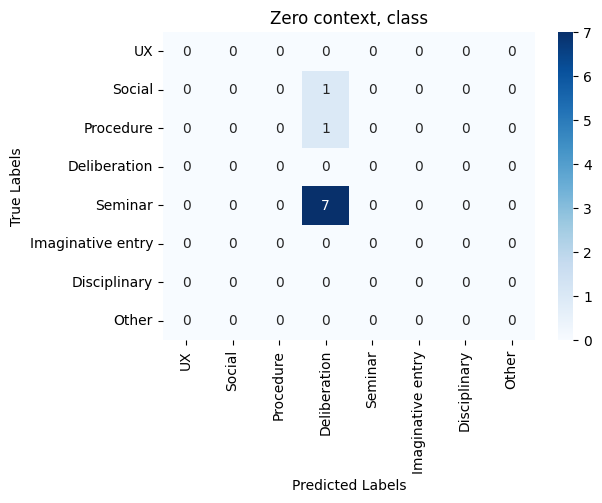

In [28]:
# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"])

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"], yticklabels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"])

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Zero context, class")

# Show the plot
plt.show()